# Self-Study Assignment 1.1: Basic Analysis in Python
- Done by: A Alkaff Ahamed
- Grade: Not Grade
- 10 April 2025



Here's a practice exercise for you to get comfortable with programming in Python. We recommend you try out this exercise and try going through the [Python documentation](https://www.python.org/about/help/). if you have any issues. You can also discuss your experience with your peers using the Week 1: Q&A Discussion Board.

## Scenario:

You are a data analyst at a technology education company. The company wants to analyse student performance data to understand trends and improve their course offerings. You need to create a Python program that processes student data, performs basic analysis, and visualises the results.

## Assignment Instructions:

Create a Python notebook to construct, process, and analyse student performance data using the concepts learned in Week 1. Please ensure to carefully follow the instructions.

Here is the dataset for this exercise - student_data.csv

### Utilise Libraries/Data Setup

- Import the necessary libraries (pandas, matplotlib, seaborn)
- Use the provided dataset with the following columns: - student_id - name - age - course - score

### Data Manipulation and Enhancement

1. Generate at least two visualisations of the data (using matplotlib)
2. Create a new column that categorises students based on their scores: 
   - Excellent: 90-100 
   - Good: 80-89 
   - Average: 70-79 
   - Below Average: below 70
3. Filter the data to show only students with scores above 80
4. Check for and handle any missing values in the dataset
5. Create a function to calculate the average score for each course
6. Display summary statistics of the data

### Control Structures Implementation

- Implement conditional statements to process student data.
- Use loops to iterate through the dataset and perform operations
- Implement exception handling for potential errors

### Advanced Data Analysis

- Use pandas functions to group and analyse the data by course
- Create visualizations that show the distribution of scores across different courses

Estimated time: 60-90 minutes

Note: *There will not be any submission for this activity.* any submission for this activity. activity.* any submission for this activity. activity.* any submission for this activity.ivity.* any submission for this activity.ity.* any submission for this activity.

In [1]:
# Import statements

%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load Data
df = pd.read_csv("student_data.csv")
df.head()

,student_id,name,age,course,score
0,1001,Alice Smith,22,Python,95.0
1,1002,Bob Johnson,19,Data Science,82.0
2,1003,Charlie Williams,24,Web Development,NaN
3,1004,David Brown,23,Machine Learning,91.0
4,1005,Eva Davis,27,Python,65.0


## (1) Generate at least two visualisations of the data (using matplotlib)

My thinking was to use a Pie Chart to see number of students in each course and Histogram to see the score distribution. Then ChatGPT suggested another idea to explore if age and score are related. This inspired a 3rd chart, scatter plot. 

1. **Pie Chart** to show distribution of students across the courses
2. **Histogram** to show distribution of scores of all students
3. (Bonus) **Scatter plot** to explore if age and score are related

### Pie Chart

1. Create a new df (`course_counts_df`) for the aggregated function `value_counts()`
2. Use `course_counts_df` to plot the pie chart: `plt.pie()`


In [28]:
# Pie Chart 

# Prepare the data
course_counts_df = df['course'].value_counts().reset_index()

# Same as doing
# course_counts = df['course'].value_counts() # This is a series
# course_counts_df = course_counts.reset_index()

course_counts_df

,course,count
0,Python,5
1,Data Science,5
2,Web Development,5
3,Machine Learning,5


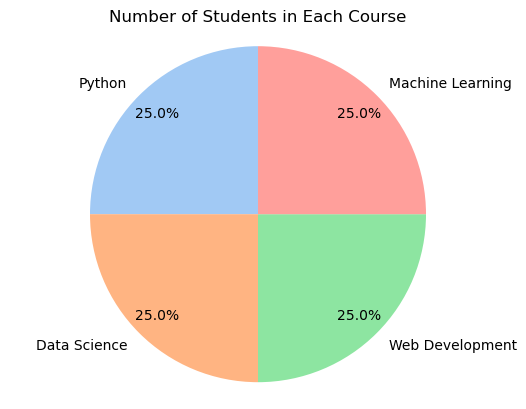

In [35]:
# Plot using Matplotlib and Seaborn

sns.set_palette("pastel")
plt.pie(course_counts_df['count'], 
        labels=course_counts_df['course'],
        autopct='%1.1f%%', 
        #autopct=lambda p: f'{int(p * sum(course_counts_df["count"]) / 100)}',  # Display the actual number of students
        pctdistance=0.85,  # Move the percentage labels closer to the edge
        startangle=90)

plt.title('Number of Students in Each Course')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.

plt.savefig('task_1a_piechart.png')
plt.show()

#### Analysis

- All students are equally distrubited across the 4 subjects

### Histogram

1. (optional) calculate the range and add the bins using `np.arange()`
2. Plot the histogram using `sns.histplot()` or `plt.histplot()`


In [37]:
# Prepare the data

min_v = df["score"].min()
max_v = df["score"].max()

bins = np.arange(min_v, max_v + 5, 5)  # max_v + 5 is required so the last bin is included

print(f"min_v={min_v}, max_v={max_v}")
print(bins)

min_v=65.0, max_v=95.0
[65. 70. 75. 80. 85. 90. 95.]


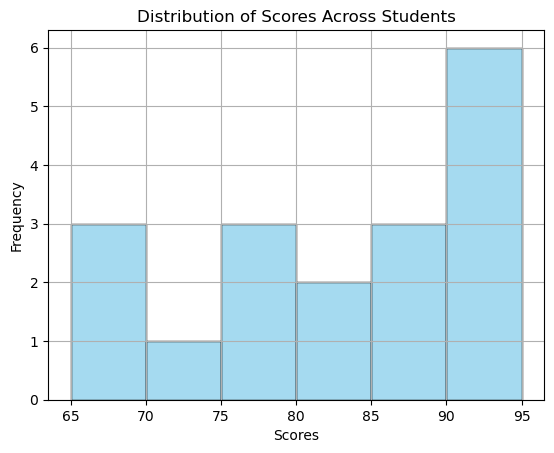

In [40]:
# Plot using Matplotlib and Seaborn

sns.histplot(df["score"], 
             bins=bins, 
             kde=False, # kde=False turns off the KDE line
             color='skyblue')

plt.title('Distribution of Scores Across Students')
plt.xlabel('Scores')
plt.ylabel('Frequency')
plt.grid(True)

plt.show()


<Figure size 640x480 with 0 Axes>

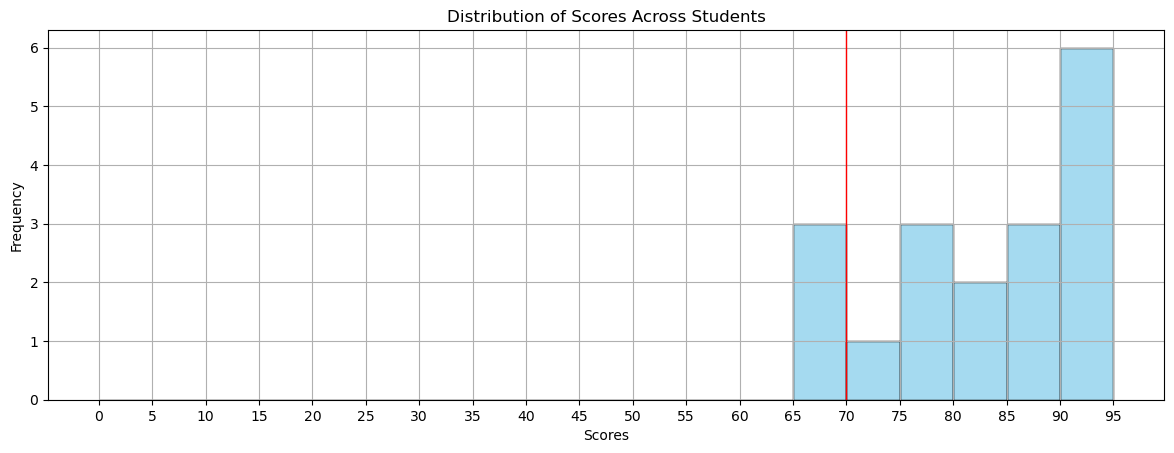

In [75]:
# Another version for 0-100 range

plt.figure(figsize=(14.4, 4.8)) # Default size is (6.4, 4.8)

sns.histplot(df["score"], 
             bins=np.arange(0, 100, 5), 
             kde=False, # kde=False turns off the KDE line
             color='skyblue')

# Red vertical line indicates passing score
plt.axvline(x=70, color='red', linestyle='-', linewidth=1)

plt.title('Distribution of Scores Across Students')
plt.xlabel('Scores')
plt.ylabel('Frequency')

plt.xticks(np.arange(0,100,5))
plt.grid(True)

plt.savefig('task_1b_histogram.png')
plt.show()

#### Analysis

- Everyone scored above 65
- With assumption 70% is passing score, only 3 failed
- All the subjects must be easy
- Too few students to analyse distribution for every subject


### Scatter Plot

1. Use `plt.scatter()` or `sns.scatterplot()` to plot the scatter plot
2. (optional) plot a scatter plot with regression line using `sns.regplot()`


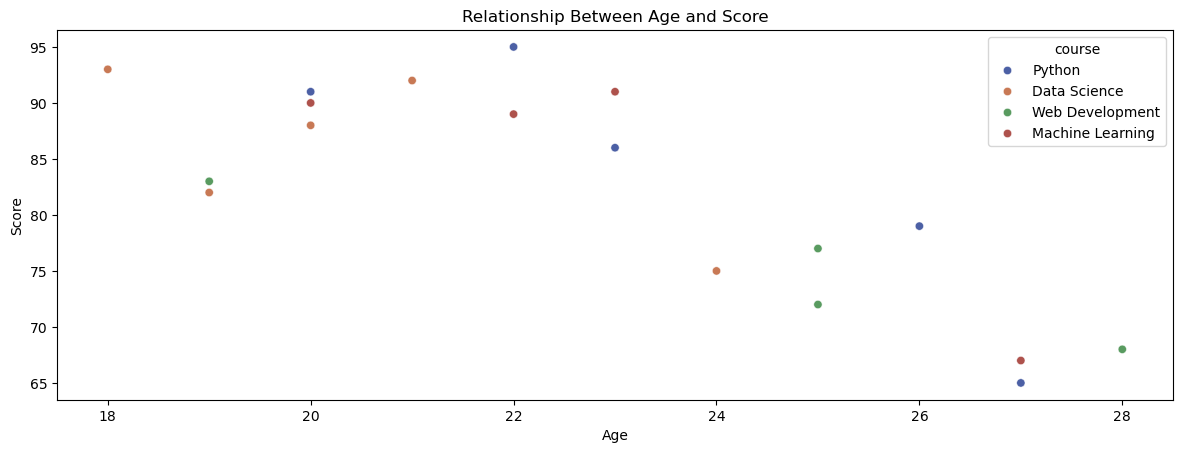

In [69]:
# Plot using Matplotlib and Seaborn

plt.figure(figsize=(14.4, 4.8)) # Default size is (6.4, 4.8)
sns.scatterplot(x=df["age"], 
                y=df["score"], 
                #color='blue', # Single Colour
                hue=df["course"], # Courses colour-coded
                palette="dark",
                alpha=0.7)

plt.title('Relationship Between Age and Score')
plt.xlabel('Age')
plt.ylabel('Score')

plt.savefig('task_1c_scatterplot.png')
plt.show()

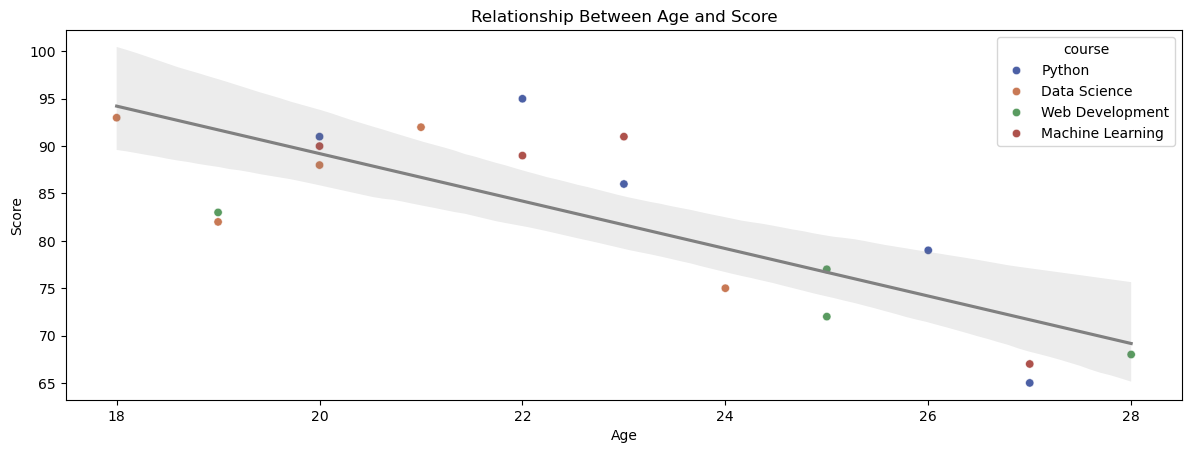

In [74]:
# Same plot with regression line added

plt.figure(figsize=(14.4, 4.8)) # Default size is (6.4, 4.8)

sns.scatterplot(x=df["age"], 
                y=df["score"], 
                #color='blue', # Single Colour
                hue=df["course"], # Courses colour-coded
                palette="dark",
                alpha=0.7)

sns.regplot(x=df["age"], 
            y=df["score"],
            scatter=False, 
            # scatter_kws={'color': 'blue', 'alpha': 0.5},  # If scatter=True, use this
            #order=2,  # Plots a quadratic trend
            line_kws={'color': 'gray'})


plt.title('Relationship Between Age and Score')
plt.xlabel('Age')
plt.ylabel('Score')

plt.savefig('task_1c_regplot.png')
plt.show()

#### Analysis

- There is indeed a downward trend in age against score
- Younger students scored higher than older students


## (2) Create a new column that categorises students based on their scores:

- Excellent: 90-100
- Good: 80-89
- Average: 70-79
- Below Average: below 70

### Method 1 Using `apply()` function

1. Create the `student_category(x)` function
2. Use `df.apply(student_category)` to create the new column


In [76]:
def student_category(x):
    if x >=90 and x <= 100:
        return "Excellent"
    elif x >= 80:
        return "Good"
    elif x >= 70:
        return "Average"
    else:
        return "Below Average"



In [78]:
# Apply the function to the 'score' column to create the 'category' column
df['category'] = df['score'].apply(student_category)

# Display the DataFrame to check the new 'category' column
df.head()

,student_id,name,age,course,score,category
0,1001,Alice Smith,22,Python,95.0,Excellent
1,1002,Bob Johnson,19,Data Science,82.0,Good
2,1003,Charlie Williams,24,Web Development,NaN,Below Average
3,1004,David Brown,23,Machine Learning,91.0,Excellent
4,1005,Eva Davis,27,Python,65.0,Below Average


### Method 2 Using `pd.cut()` binning

1. Create the `bins` and `labels`
2. Use `pd.cut()` to create the new column


In [80]:
# Define the bins and labels
bins = [0, 69, 79, 89, 100]  
labels = ['Below Average', 'Average', 'Good', 'Excellent']


# Create the 'category' column based on the bins and labels
df['category'] = pd.cut(df['score'], bins=bins, labels=labels, right=True)

df.head()

,student_id,name,age,course,score,category
0,1001,Alice Smith,22,Python,95.0,Excellent
1,1002,Bob Johnson,19,Data Science,82.0,Good
2,1003,Charlie Williams,24,Web Development,NaN,NaN
3,1004,David Brown,23,Machine Learning,91.0,Excellent
4,1005,Eva Davis,27,Python,65.0,Below Average


### Analysis

- Both methods gets the job done
- For `pd.cut()`, `NaN` is giving the result as `NaN` but for `df.apply()`, `NaN` results in "Below Average"
- That means for pd.cut(), the data needs to be cleaned first by using this line below:
  ```python
  # Fill NaN values with 0
  df['score'] = df['score'].fillna(0)
  ```

## (4) Check for and handle any missing values in the dataset

- Planned to remove records with NaN
- There are other ways like taking mean but I feel there is not enough data to use this in a practical situation


Summary of ways:
```python
# 1) Remove rows with NaN in 'score'
df_cleaned = df.dropna(subset=['score'])

# 2) Fill NaN values in 'score' with the mean
mean_score = df['score'].mean()
df['score_filled_mean'] = df['score'].fillna(mean_score)

# 3) Fill NaN values in 'score' with the median
median_score = df['score'].median()
df['score_filled_median'] = df['score'].fillna(median_score)

# 4) Fill NaN values in 'score' with 0
df['score_filled_zero'] = df['score'].fillna(0)
```

In [81]:
# Remove all NaN records

df_cleaned = df.dropna(subset=['score'])
df_cleaned.head()


,student_id,name,age,course,score,category
0,1001,Alice Smith,22,Python,95.0,Excellent
1,1002,Bob Johnson,19,Data Science,82.0,Good
3,1004,David Brown,23,Machine Learning,91.0,Excellent
4,1005,Eva Davis,27,Python,65.0,Below Average
5,1006,Frank Miller,20,Data Science,88.0,Good


## (3) Filter the data to show only students with scores above 80

- Better done after cleaning the data


In [82]:
# Filter all students scored above 80

filtered_df = df[df['score'] > 80]
filtered_df.head()


,student_id,name,age,course,score,category
0,1001,Alice Smith,22,Python,95.0,Excellent
1,1002,Bob Johnson,19,Data Science,82.0,Good
3,1004,David Brown,23,Machine Learning,91.0,Excellent
5,1006,Frank Miller,20,Data Science,88.0,Good
9,1010,Jack Anderson,18,Data Science,93.0,Excellent


## (5) Create a function to calculate the average score for each course


In [84]:
# Using groupby() and mean() function

mean_scores_df = df.groupby('course')['score'].mean().reset_index()

mean_scores_df.head()

,course,score
0,Data Science,86.00
1,Machine Learning,84.25
2,Python,83.20
3,Web Development,75.00


In [85]:
# Make it into a function

def calculate_avg_score_course(df):
    return df.groupby('course')['score'].mean().reset_index()


In [86]:
# Use the function

print(calculate_avg_score_course(df))


             course  score
0      Data Science  86.00
1  Machine Learning  84.25
2            Python  83.20
3   Web Development  75.00


## (6) Display summary statistics of the data


In [87]:
df.describe()


,student_id,age,score
count,20.00000,20.000000,18.000000
mean,1010.50000,22.700000,82.388889
std,5.91608,2.975337,9.726488
min,1001.00000,18.000000,65.000000
25%,1005.75000,20.000000,75.500000
50%,1010.50000,22.500000,84.500000
75%,1015.25000,25.000000,90.750000
max,1020.00000,28.000000,95.000000


## Control Structure Implementation

- Implement conditional statements to process student data. (already implemented in `student_category(x)`) 
- Use loops to iterate through the dataset and perform operations
- Implement exception handling for potential errors


In [91]:
# An example to iterate through all rows in the df

def safeprocess_students(df):
    
    total_score, count = 0,0
    
    for i,r in df.iterrows():
        #print (i)
        #print (r)
        try:
            score = r["score"]
            
            if pd.isna(score):
                raise ValueError("Score is missing.")
                
            if not isinstance(score, (int, float)):
                raise TypeError("Score must be a number.")
    
            # Some Dummy Process calls
            
            total_score += score
            count += 1
            
            print (f"Processed {r['name']} (id: {r['student_id']}) Successfully! ")
            
        except (ValueError, TypeError) as e:
            print(f"Error at student name {r['name']} (id: {r['student_id']}) : {e}")
            continue
    
        if count > 0:
            print(f"Processed {count} students")
            print(f"Average score for all students is {total_score/count}")
        else:
            print("No valid scores to process")



In [92]:
safeprocess_students(df)

Processed Alice Smith (id: 1001) Successfully! 
Processed 1 students
Average score for all students is 95.0
Processed Bob Johnson (id: 1002) Successfully! 
Processed 2 students
Average score for all students is 88.5
Error at student name Charlie Williams (id: 1003) : Score is missing.
Processed David Brown (id: 1004) Successfully! 
Processed 3 students
Average score for all students is 89.33333333333333
Processed Eva Davis (id: 1005) Successfully! 
Processed 4 students
Average score for all students is 83.25
Processed Frank Miller (id: 1006) Successfully! 
Processed 5 students
Average score for all students is 84.2
Processed Grace Wilson (id: 1007) Successfully! 
Processed 6 students
Average score for all students is 82.16666666666667
Error at student name Henry Moore (id: 1008) : Score is missing.
Processed Ivy Taylor (id: 1009) Successfully! 
Processed 7 students
Average score for all students is 81.71428571428571
Processed Jack Anderson (id: 1010) Successfully! 
Processed 8 students

## Advanced Data Analysis
- Use pandas functions to group and analyse the data by course
- Create visualizations that show the distribution of scores across different courses


## Group and Analyse

- Use `groupby("course")` and `describe()`


In [98]:
# Analyse data by course

df.groupby("course").describe()


student_id                                                    \
                      count    mean       std     min     25%     50%     75%   
course                                                                          
Data Science            5.0  1010.0  6.324555  1002.0  1006.0  1010.0  1014.0   
Machine Learning        5.0  1012.0  6.324555  1004.0  1008.0  1012.0  1016.0   
Python                  5.0  1009.0  6.324555  1001.0  1005.0  1009.0  1013.0   
Web Development         5.0  1011.0  6.324555  1003.0  1007.0  1011.0  1015.0   

                           age        ...             score                    \
                     max count  mean  ...   75%   max count   mean        std   
course                                ...                                       
Data Science      1018.0   5.0  20.4  ...  21.0  24.0   5.0  86.00   7.516648   
Machine Learning  1020.0   5.0  22.6  ...  23.0  27.0   4.0  84.25  11.528949   
Python            1017.0   5.0  23.6  ...  26.0  27.0   5.0  83.20  11.798305   
Web Development   1019.0   5.0  24.2  ...  25.0  28.0   4.0  75.00   6.480741   

                                                 
                   min   25%   50%    75%   max  
course                                           
Data Science      75.0  82.0  88.0  92.00  93.0  
Machine Learning  67.0  83.5  89.5  90.25  91.0  
Python            65.0  79.0  86.0  91.00  95.0  
Web Development   68.0  71.0  74.5  78.50  83.0  

[4 rows x 24 columns]

In [101]:
df.groupby("course")["score"].describe()

,count,mean,std,min,25%,50%,75%,max
course,,,,,,,,
Data Science,5.0,86.00,7.516648,75.0,82.0,88.0,92.00,93.0
Machine Learning,4.0,84.25,11.528949,67.0,83.5,89.5,90.25,91.0
Python,5.0,83.20,11.798305,65.0,79.0,86.0,91.00,95.0
Web Development,4.0,75.00,6.480741,68.0,71.0,74.5,78.50,83.0


## Visualizations that show distribution of scores across different courses

1. Box Plot
2. Violin Plot
3. Bar Chart


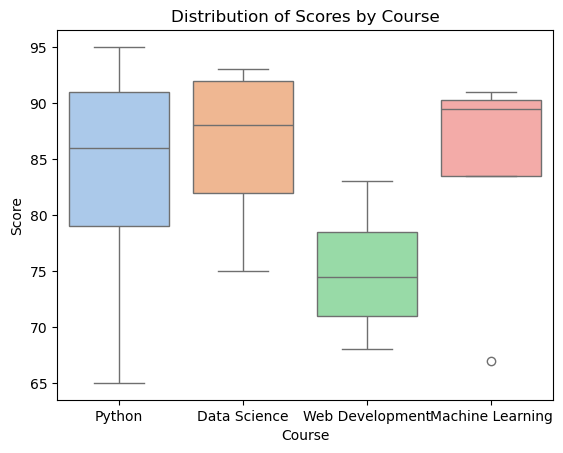

In [117]:
# Box Plot

#sns.boxplot(data=df, x='course', y='score', palette='pastel')
sns.boxplot(x=df["course"], 
            y=df["score"], 
            #color='blue', # Single Colour
            hue=df["course"], # Courses colour-coded
            palette="pastel")

plt.title('Distribution of Scores by Course (Box Plot)')
plt.xlabel('Course')
plt.ylabel('Score')

plt.show()

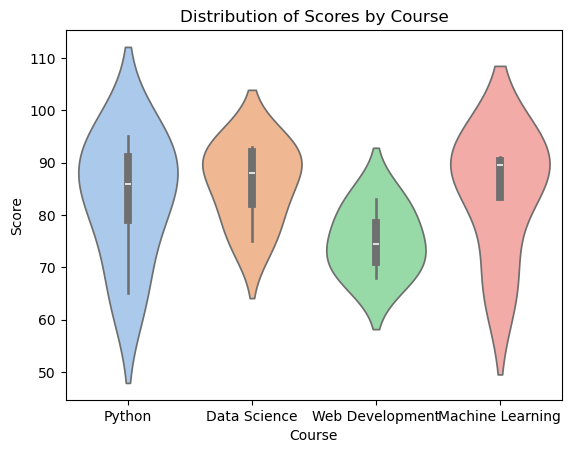

In [118]:
# Violin Plot

sns.violinplot(x=df["course"], 
               y=df["score"], 
               #color='blue', # Single Colour
               hue=df["course"], # Courses colour-coded
               palette="pastel")

plt.title('Distribution of Scores by Course (Violin Plot)')
plt.xlabel('Course')
plt.ylabel('Score')

plt.show()

In [114]:
# Barchart

#Prepare the data
df_mean_scores = df.groupby("course")["score"].mean().reset_index()
df_mean_scores.head()


,course,score
0,Data Science,86.00
1,Machine Learning,84.25
2,Python,83.20
3,Web Development,75.00


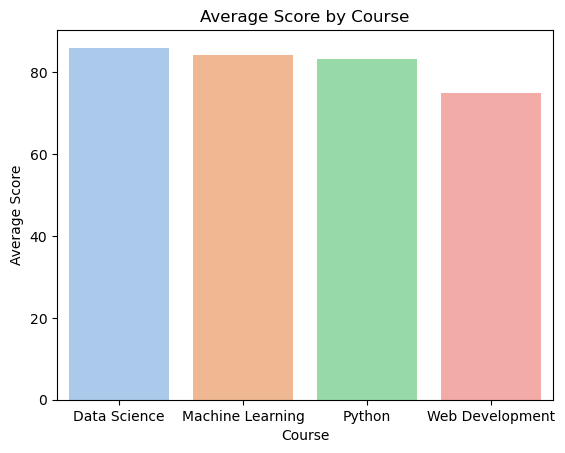

In [116]:
# Barplot

sns.barplot(data=df_mean_scores, 
            x='course', 
            y='score', 
            hue='course',
            palette='pastel')

plt.title('Average Scores by Course')
plt.xlabel('Course')
plt.ylabel('Average Score')

plt.show()

<Figure size 640x480 with 0 Axes>

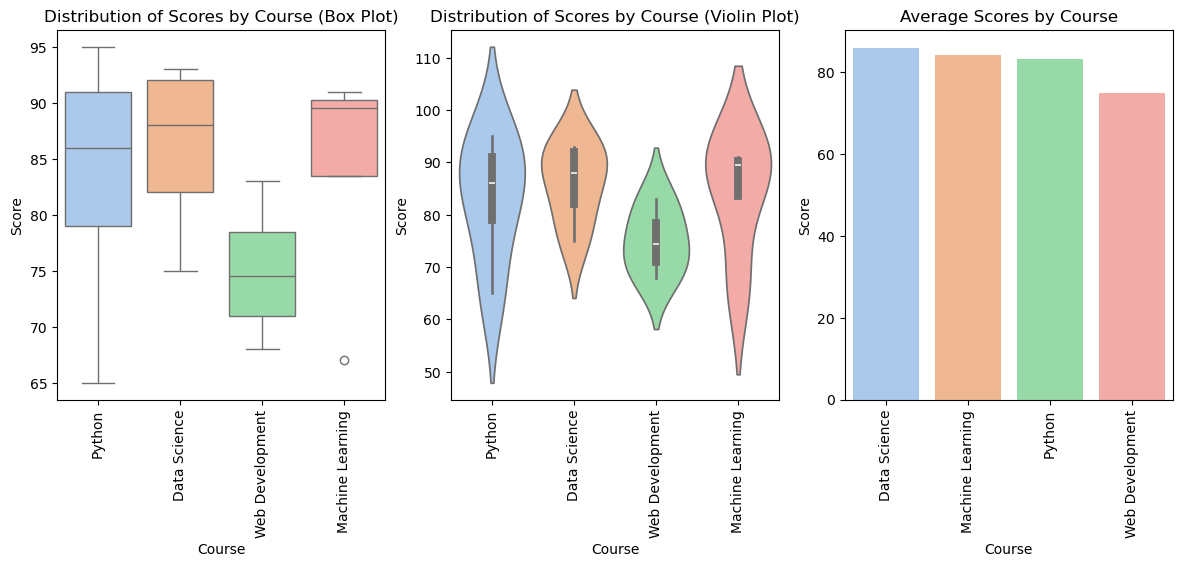

In [130]:
# Put them all together

# Set up the figure with 1 row and 3 columns for subplots
fig, axes = plt.subplots(1, 3, figsize=(14.4, 4.8))

# Box Plot
sns.boxplot(x=df["course"], 
            y=df["score"], 
            #color='blue', # Single Colour
            hue=df["course"], # Courses colour-coded
            palette="pastel",
            ax=axes[0]) # Must Specify which axis the plot belongs to

axes[0].set_title("Distribution of Scores by Course (Box Plot)")

# Violin Plot
sns.violinplot(x=df["course"], 
               y=df["score"], 
               #color='blue', # Single Colour
               hue=df["course"], # Courses colour-coded
               palette="pastel",
               ax=axes[1]) # Must Specify which axis the plot belongs to

axes[1].set_title("Distribution of Scores by Course (Violin Plot)")

# Bar Chart
sns.barplot(data=df_mean_scores, 
            x='course', 
            y='score', 
            hue='course',
            palette='pastel',
            ax=axes[2]) # Must Specify which axis the plot belongs to

axes[2].set_title("Average Scores by Course")

for i,ax in enumerate(axes):
    axes[i].set_xticks(axes[i].get_xticks())
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90)
    axes[i].set_xlabel('Course')
    axes[i].set_ylabel('Score')

plt.savefig('task_6_advanced_analysis.png')
plt.show()

In [131]:
# END